**Lab 9 - Dense Vector (Embedding)**

Submitted by: Angeline A - 2348409

Submitted on: 13/09/2024

In [1]:
pip install youtube-transcript-api transformers nltk spacy


In [2]:
import nltk
from youtube_transcript_api import YouTubeTranscriptApi
from transformers import pipeline
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 1: Extract, Clean, and Punctuate Transcript

def get_transcript(video_id):
    """Extracts transcript from a YouTube video given its ID."""
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
    return " ".join([entry['text'] for entry in transcript])

def clean_and_punctuate(transcript):
    """Cleans and punctuates the transcript using a pre-trained model."""
    # Use T5 model for punctuation restoration
    punctuator = pipeline("text2text-generation", model="t5-small")

    # Chunking the text to avoid exceeding token limits
    max_length = 512  # Adjust based on the model's capabilities
    chunks = [transcript[i:i+max_length] for i in range(0, len(transcript), max_length)]

    punctuated_transcript = ""
    for chunk in chunks:
        cleaned_chunk = chunk.lower()  # Lowercasing for consistent punctuation
        punctuated_chunk = punctuator(cleaned_chunk, max_length=512)[0]['generated_text']
        punctuated_transcript += punctuated_chunk + " "

    return punctuated_transcript.strip()


# Extract and clean the transcript
video_id = "W6wVU5b5nQk"
raw_transcript = get_transcript(video_id)
print("Raw Transcript:\n", raw_transcript)

cleaned_punctuated_transcript = clean_and_punctuate(raw_transcript)
print("Cleaned and Punctuated Transcript:\n", cleaned_punctuated_transcript)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Raw Transcript:
 foreign [Music] once upon a time in a small village there lived a wise old Monk he was known far and wide for his wisdom and sense of humor one day a young and eager student named Sam approached the master and said master I want to learn the secret to happiness and success please teach me master Sito looked at Sam with a twinkle in his eye and said very well young one But first you must complete a simple task go to the market and buy the biggest juiciest watermelon you can find then carry it on your head and walk through the village without dropping it Sam was puzzled but determined he went to the market and found a massive watermelon balancing it on his head he walked through the village with utmost concentration as he passed by people couldn't help but laugh and cheer him on some even joined in clapping and making funny faces finally after a bumpy Journey Sam reached Master setu's Hut the watermelon was intact and Sam was relieved he looked at Master situ expecting t

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Cleaned and Punctuated Transcript:
 a young and eager student named sam approached the master and said master i want to learn the secret to happiness and success please teach me master sito looked at sam with a twinkle in his eye and said very well young one but first you must complete a simple task go to the market and buy the biggest juiciest watermelon you can find then carry it on your head an ice cream . master setu's hut the watermelon was intact and sam was relieved he looked at master situ expecting to be praised for his accomplishment . sam was puzzled but determined he went to the market and found a massive watermelon balancing it on his head he walked through the village with utmost concentration . sam was determined he went to the market and found a massive watermelon balancing it on his head he walked through the he sat in laffer well then young won he exclaimed wiping tears of mirth from his eyes he exclaimed wiping tears of mirth from his eyes he exclaimed wiping tears o

In [3]:
!pip install gensim


In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import re
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# Function to preprocess the transcript (tokenization)
def preprocess_text(text):
    # Tokenizing the text into words
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    words = word_tokenize(text)
    return words

tokens = preprocess_text(cleaned_punctuated_transcript)


In [7]:
# Set the window size (k value)
window_size = 5

# Skip-Gram model
skipgram_model = Word2Vec(sentences=[tokens], vector_size=100, window=window_size, sg=1, min_count=1)

# CBOW model
cbow_model = Word2Vec(sentences=[tokens], vector_size=100, window=window_size, sg=0, min_count=1)


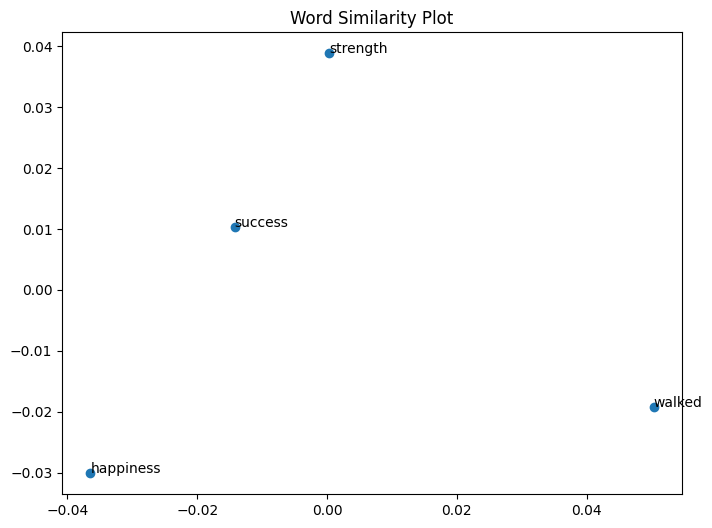

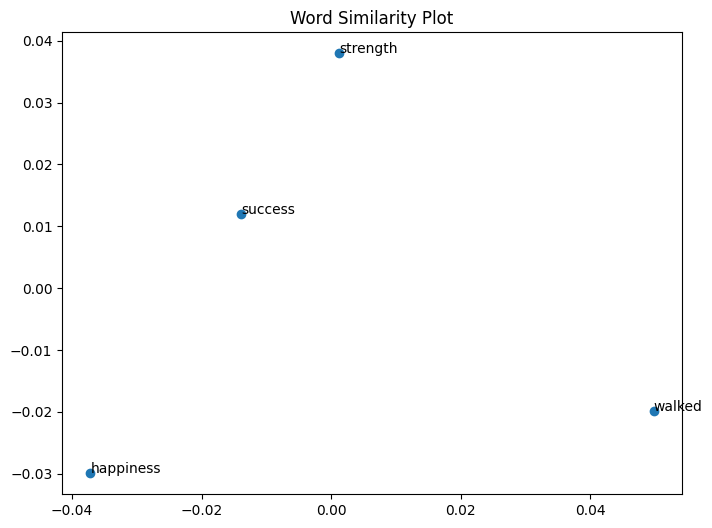

In [9]:
def plot_similarity(model, words):
    word_vectors = np.array([model.wv[word] for word in words])
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    plt.figure(figsize=(8, 6))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('Word Similarity Plot')
    plt.show()

# Example words to plot
words_to_plot = ['happiness', 'success', 'walked', 'strength']  # Replace with words from your transcript
plot_similarity(skipgram_model, words_to_plot)  # For Skip-Gram
plot_similarity(cbow_model, words_to_plot)  # For CBOW


In [10]:
def closest_words(model, word, N=5):
    return model.wv.most_similar(word, topn=N)

# Find closest 5 words for 'car'
word_X = 'happiness'
print("Skip-Gram Model - Closest words to 'car':")
print(closest_words(skipgram_model, word_X, N=5))

print("\nCBOW Model - Closest words to 'car':")
print(closest_words(cbow_model, word_X, N=5))


Skip-Gram Model - Closest words to 'car':
[('success', 0.25694847106933594), ('go', 0.21948722004890442), ('take', 0.2062685489654541), ('relieved', 0.20432718098163605), ('from', 0.18782873451709747)]

CBOW Model - Closest words to 'car':
[('success', 0.24247100949287415), ('go', 0.21694445610046387), ('take', 0.19586047530174255), ('relieved', 0.19158661365509033), ('from', 0.18219555914402008)]


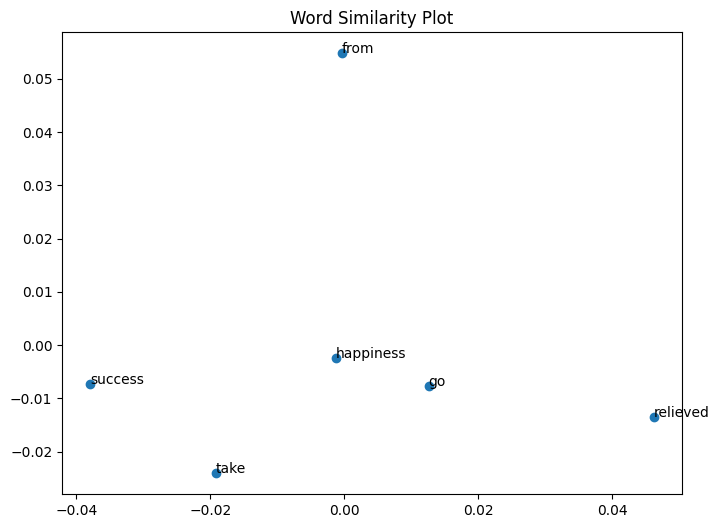

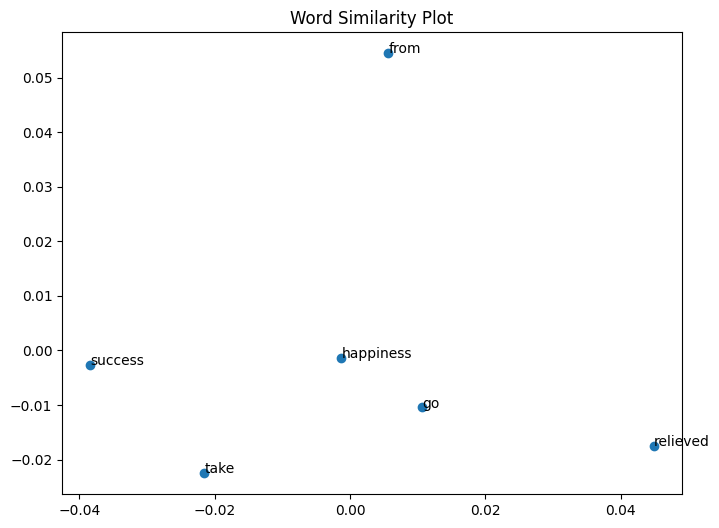

In [13]:
def plot_closest_words(model, word, N=5):
    # Find the closest words
    closest_words = model.wv.most_similar(word, topn=N)
    words = [word] + [w[0] for w in closest_words]

    plot_similarity(model, words)

# Plot closest words for 'car'
plot_closest_words(skipgram_model, 'happiness', N=5)  # For Skip-Gram
plot_closest_words(cbow_model, 'happiness', N=5)  # For CBOW
